In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = "../../daten/output/"

In [10]:
df_risk_sex = pd.read_stata(DATA_DIR + "chart_ltc_risk_by_sex.dta")
df_risk_sex.drop(12, inplace=True)
df_risk_sex

,sex,age_group,exp_prob_ltc_mean,exp_prob_ltc_SEM
0,[1] männlich,18_35,47.750000,4.492987
1,[1] männlich,36_45,50.294117,3.978895
2,[1] männlich,46_55,57.700001,3.785606
3,[1] männlich,56_65,50.903225,2.809399
4,[1] männlich,66_75,45.117645,2.561535
5,[1] männlich,76_99,46.483334,3.134868
6,[2] weiblich,18_35,58.824562,4.035410
7,[2] weiblich,36_45,62.309090,3.642794
8,[2] weiblich,46_55,54.343750,3.513171
9,[2] weiblich,56_65,56.354431,2.835764


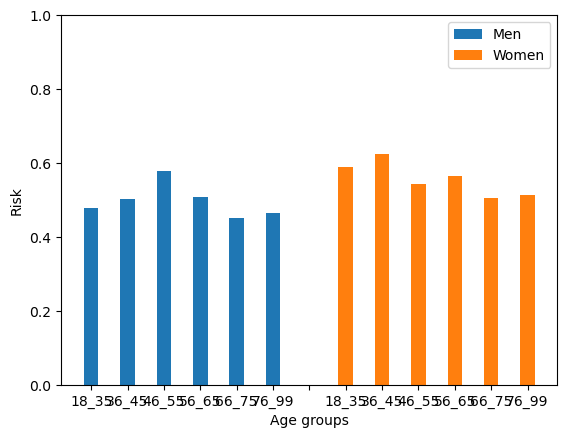

In [19]:
labels = ["Men", "Women"]
age_groups = list(df_risk_sex["age_group"].unique())
num_age_groups = len(age_groups)
fig, ax = plt.subplots()
for i, sex in enumerate(df_risk_sex["sex"].unique()):
    df_sex = df_risk_sex.loc[df_risk_sex["sex"] == sex]
    ax.bar(
        np.arange(num_age_groups) + i * 7,
        df_sex["exp_prob_ltc_mean"].values / 100,
        label=labels[i],
        width=0.4
    )
    ax.set_ylim([0, 1])
    plt.xticks(np.arange(13), age_groups + [""] + age_groups)
    ax.set_ylabel("Risk")
    ax.set_xlabel("Age groups")
    ax.legend()

In [12]:
df_risk_edu = pd.read_stata(DATA_DIR + "chart_ltc_risk_by_education.dta")
df_risk_edu

,education,age_group,exp_prob_ltc_mean,exp_prob_ltc_SEM
0,0.0,18_35,47.000000,5.569273
1,0.0,36_45,66.363640,5.138576
2,0.0,46_55,56.666668,15.420045
3,0.0,56_65,45.500000,9.202958
4,0.0,66_75,53.666668,7.814313
5,0.0,76_99,58.888889,10.599324
6,1.0,18_35,57.812500,4.687500
7,1.0,36_45,52.962265,4.219999
8,1.0,46_55,54.166668,3.788487
9,1.0,56_65,50.306122,2.785985


In [ ]:
labels = ["Low Education", "Medium Education", "High Education"]
fig, ax = plt.subplots()
for edu in range(3):
    df_edu = df_risk_edu.loc[df_risk_sex["education"] == edu]
    ax.plot(df_edu["age_group"], df_edu["exp_prob_ltc_mean"].values / 100, label=labels[edu])
    ax.set_ylim([0, 1])
    ax.set_ylabel("Risk")
    ax.set_xlabel("Age groups")
    ax.legend()